In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os 

plt.rcParams["font.family"] = "Times New Roman"


In [3]:
rawpath = './Raw Data'

filenames = os.listdir(rawpath)
filenames.sort()

stationA = pd.DataFrame(columns=['time','batt_num'])
stationB = pd.DataFrame(columns=['time','batt_num'])

for f in filenames:
    if 'B' in f:
        raw = pd.read_csv(rawpath+'/'+f)
        stationB = pd.concat([stationB,raw])
    elif 'A' in f:
        raw = pd.read_csv(rawpath+'/'+f)
        stationA = pd.concat([stationA,raw])
    else:
        continue

stationA.to_csv('stationA.csv',index=False)
stationB.to_csv('stationB.csv',index=False)

In [4]:
stationA = pd.read_csv('stationA.csv')
stationB = pd.read_csv('stationB.csv')

stationA['time'] = pd.to_datetime(stationA['time'])
stationA = stationA.drop_duplicates(subset='time')
stationA.set_index('time', inplace=True)  # Set as DatetimeIndex

stationB['time'] = pd.to_datetime(stationB['time'])
stationB = stationB.drop_duplicates(subset='time')
stationB.set_index('time', inplace=True)  # Set as DatetimeIndex

In [41]:
stationA_hourly = stationA.resample('h').nearest(limit=5)
stationB_hourly = stationB.resample('h').nearest(limit=5)

stationA_hourly.to_csv('stationA_hourly.csv')
stationB_hourly.to_csv('stationB_hourly.csv')

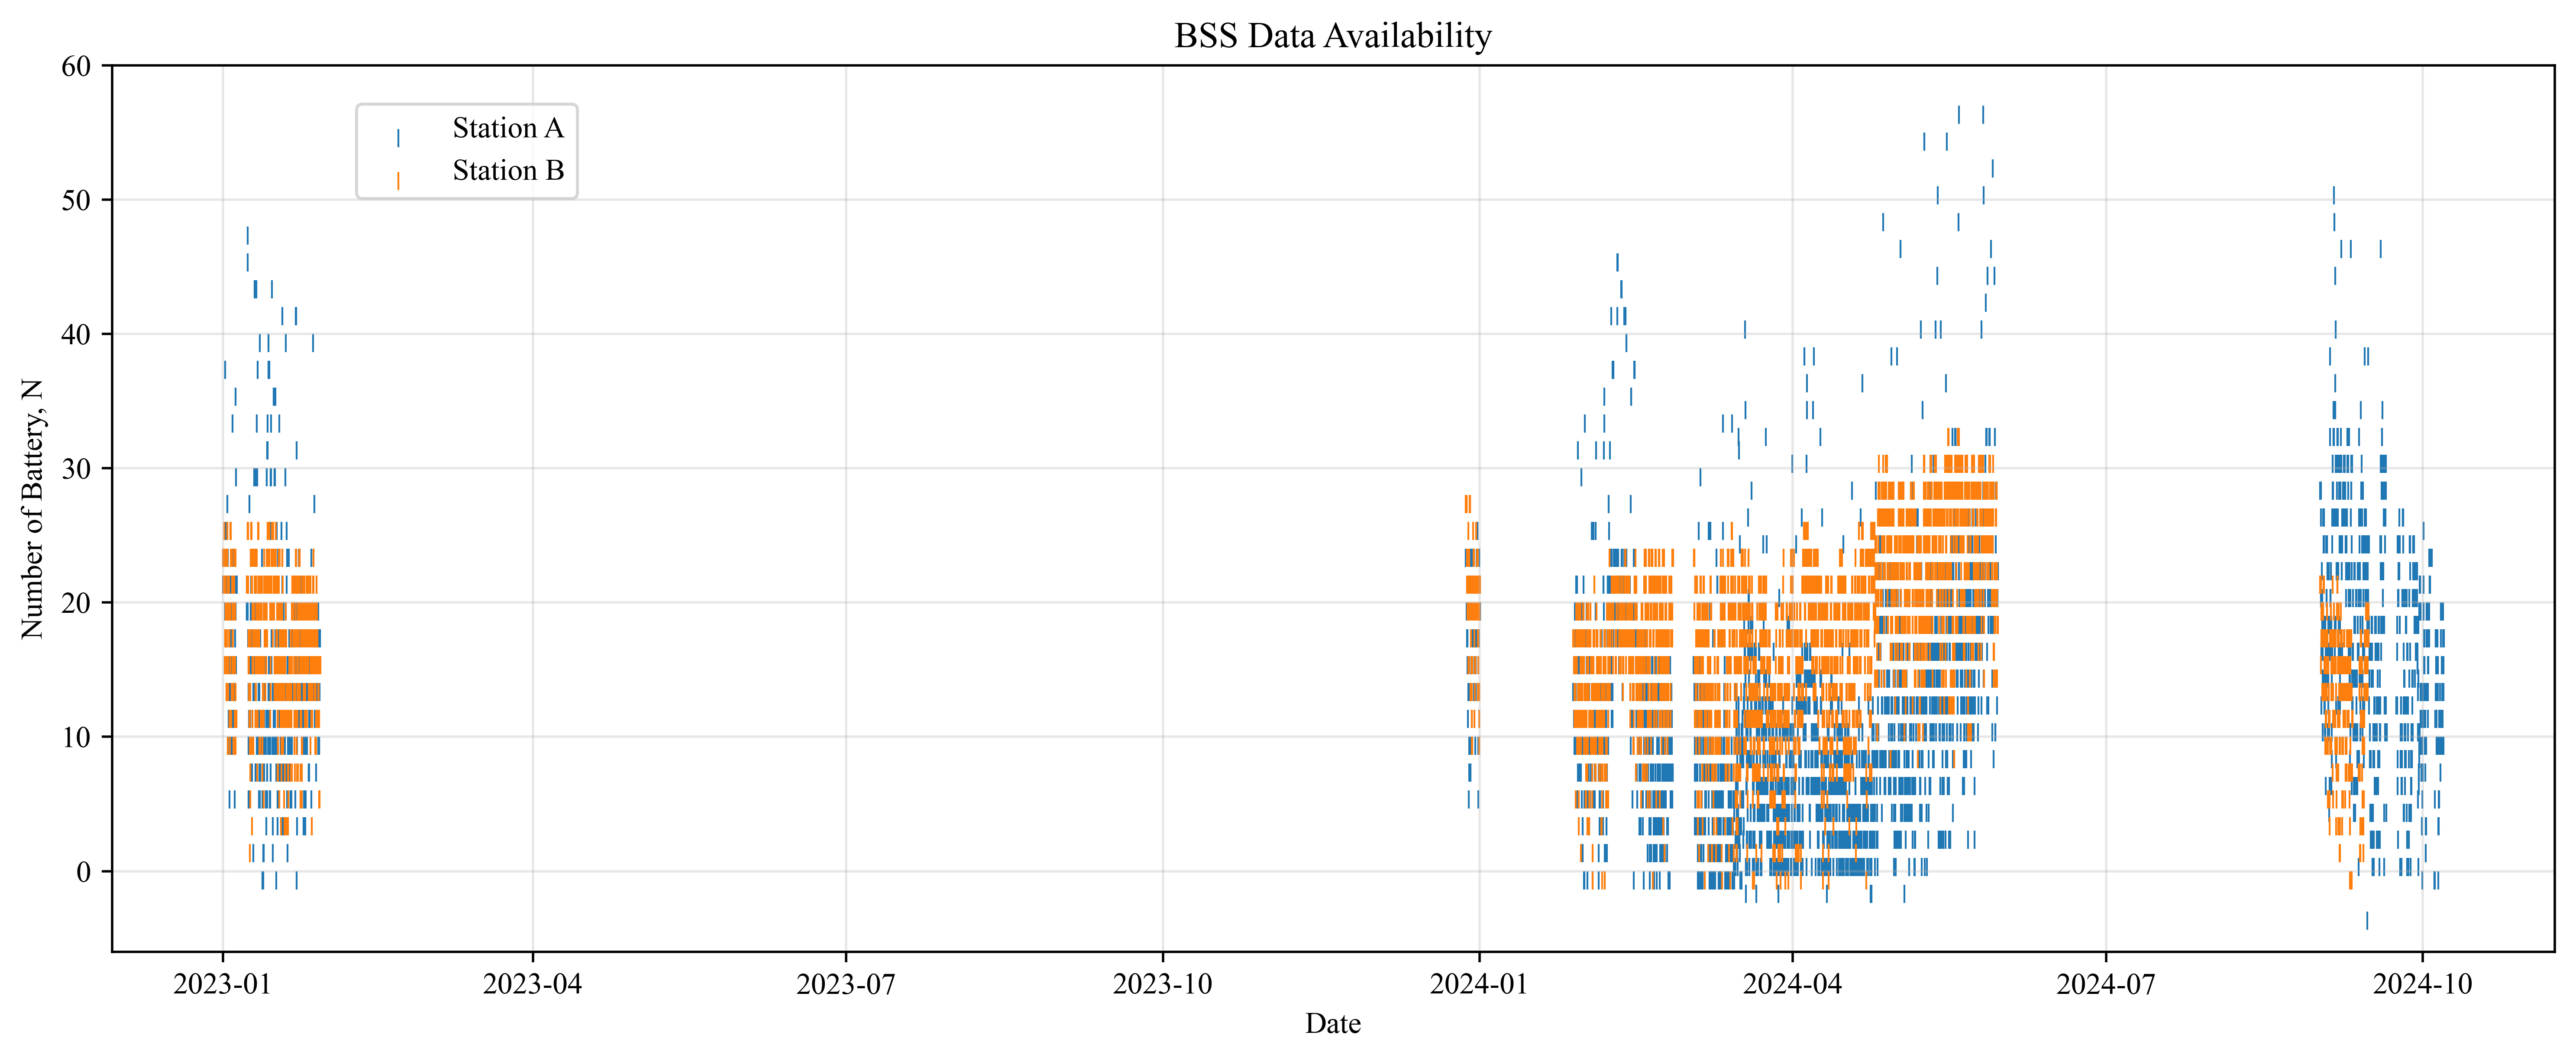

In [42]:
plt.figure(figsize=(12,5),dpi=500)

plt.grid(True, alpha=0.3)
plt.title('BSS Data Availability', fontsize = 12)
plt.scatter(stationA_hourly.index, stationA_hourly['batt_num'],marker=3,linewidths=0.6,label="Station A")
plt.scatter(stationB_hourly.index, stationB_hourly['batt_num'],marker=3,linewidths=0.6,label="Station B")

plt.ylabel('Number of Battery, N', fontsize=10)
plt.xlabel('Date', fontsize=10)

plt.legend(loc=[0.1,0.85],fontsize = 10)
plt.tight_layout()

plt.savefig('../Figures/BSS_Data_Availability.png',dpi='figure', format='png')

/var/folders/97/x_vpt0wx4nn7jlpgrfc86gd80000gn/T/ipykernel_14926/1604861696.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isna(stationA_hourly['batt_num'][i]) or isna(stationB_hourly['batt_num'][i]):


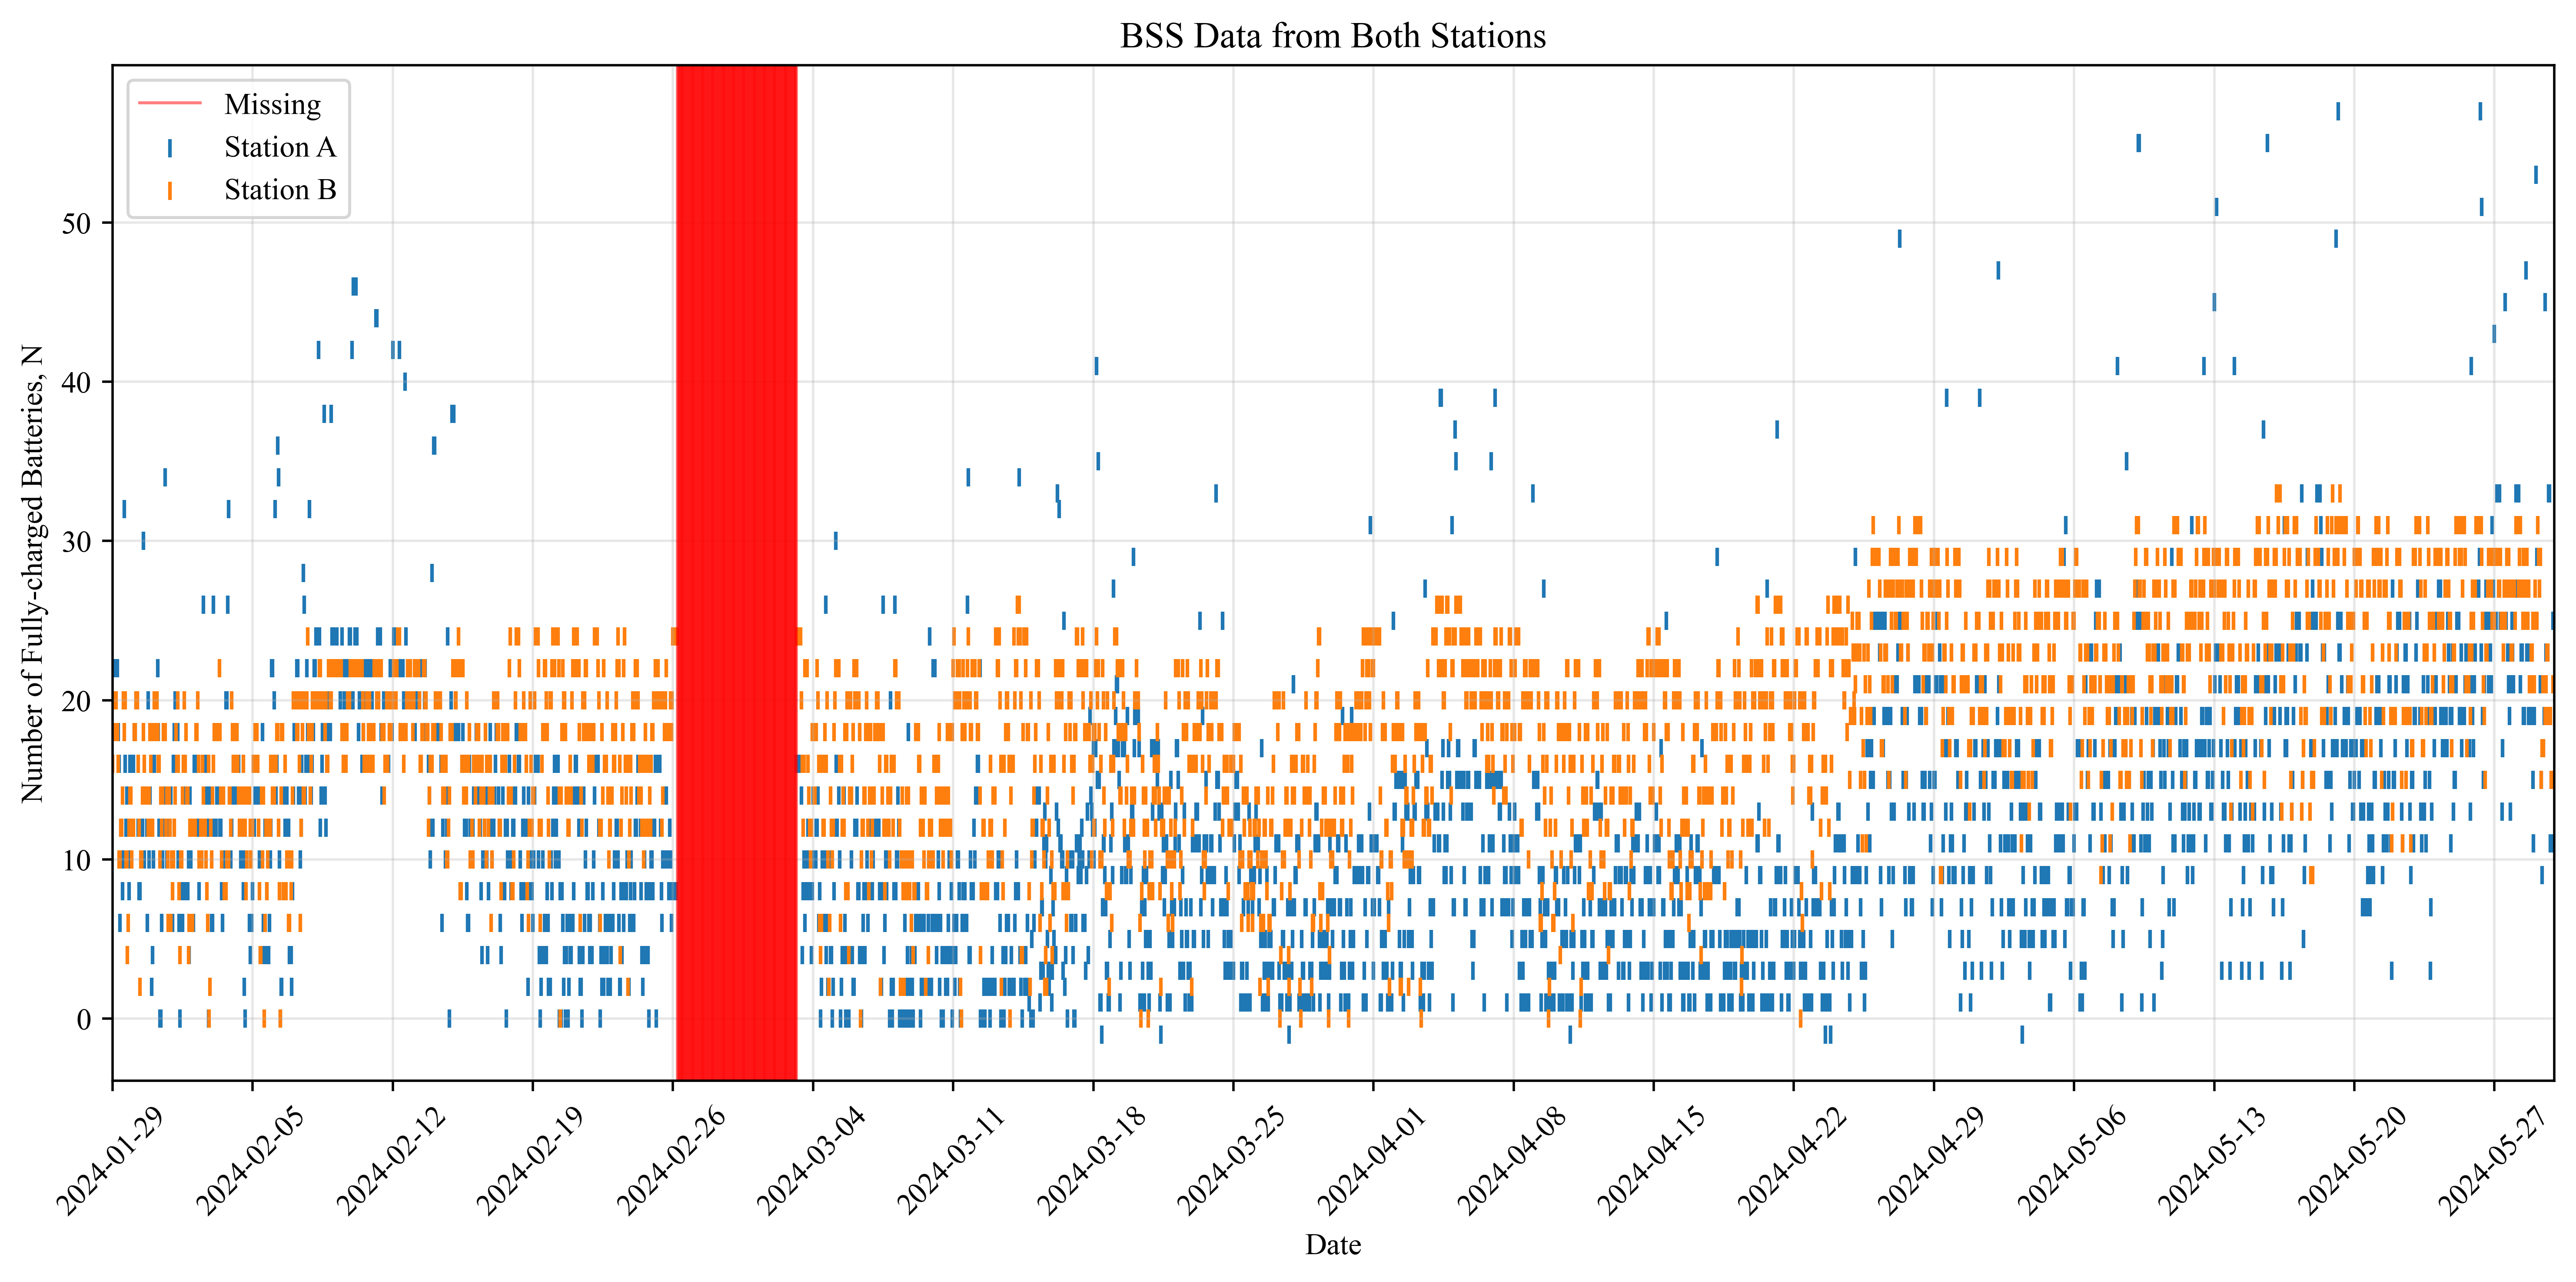

In [71]:
import matplotlib.pyplot as plt
from pandas import isna

# Define the range for plotting
start, end = 9432, 12360

plt.figure(figsize=(12, 6), dpi=500)
plt.grid(True, alpha=0.3)
plt.title('BSS Data from Both Stations', fontsize=12)

# Mark missing data with red vertical lines, adding the label only once
missing_label_added = False
for i in range(start, end):
    if isna(stationA_hourly['batt_num'][i]) or isna(stationB_hourly['batt_num'][i]):
        if not missing_label_added:
            plt.axvline(x=stationA_hourly.index[i], color='r', alpha=0.5, linewidth=1, label="Missing")
            missing_label_added = True
        else:
            plt.axvline(x=stationA_hourly.index[i], color='r', alpha=0.5, linewidth=1)

# Scatter plot for battery data from Station A and Station B
plt.scatter(stationA_hourly.index[start:end], stationA_hourly['batt_num'][start:end],
            marker='|', linewidths=1.2, label="Station A")
plt.scatter(stationB_hourly.index[start:end], stationB_hourly['batt_num'][start:end],
            marker='|', linewidths=1.2, label="Station B")

# Set axis labels and tick formatting
plt.ylabel('Number of Fully-charged Batteries, N', fontsize=10)
plt.xlabel('Date', fontsize=10)
plt.xticks(rotation=45)

# Adjust x-ticks to reduce overcrowding
plt.xticks(stationA_hourly.index[start:end:168], rotation=45)  # Adjust interval as needed
plt.xlim([stationA_hourly.index[start],stationA_hourly.index[end]])

# Add legend, improve layout, and save the figure
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.savefig('../Figures/BSS_Data_Availability_Range.png', dpi='figure', format='png')
plt.show()
